In [2]:
!pip install sklearn

  Using cached scikit_learn-0.22.2.post1-cp37-cp37m-win_amd64.whl (6.5 MB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=67a3f3aa2624e2af09ce0897d8cc3d561ff61cf80fa3c3d98a30aed21faf7ae7
  Stored in directory: c:\users\casti\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

In [4]:
X.shape, y.shape

((50, 2), (50,))

In [5]:
import matplotlib.pyplot as plt

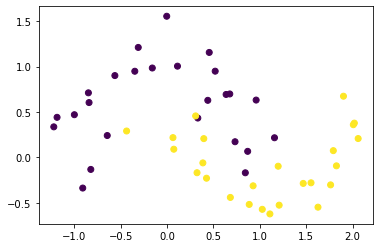

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)

In [7]:
import numpy as np
new_col = np.ones((X.shape[0], 1))
X = np.hstack([X, new_col])

In [8]:
def sigmoid(x):
    
    """Input: NumPy array
       Output: NumPy array"""
    sig = 1 / (1 + np.exp(-x))
    return sig
    
  

In [9]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

---

- In total, we have 9 weights / parameters.
- In the first (hidden) layer, we have 6 weights.
- In the last (outer) layer, we have 3 weights.
- hidden weights: (3, 2)
- outer weights: (3, 1)

In [10]:
weights_hidden = np.random.uniform(low=0.0, high=1.0, size=(3,2)) #np.random.rand()
weights_output = np.random.uniform(low=0.0, high=1.0, size=(3,1))

In [11]:
weights_hidden.shape

(3, 2)

In [12]:
weights_output.shape

(3, 1)

Feed-Forward Steps:
- Inputs, add bias
- Multiply by weight (np.dot)
- Activate!

In [13]:
weights = [weights_hidden, weights_output]

In [14]:
def feed_forward(X, weights):

    """
    1. Calculate the dot product of X
       and the weights of the first layer.

    2. Apply the sigmoid function on the result.

    3. Append an extra column of ones to the result (i.e. the bias).

    4. Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Apply the sigmoid function on the result.

    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    
    step1 = np.dot(X, weights[0]) #(50, 3) * (3, 2) -> (50, 2)
    step2 = sigmoid(step1) #(50, 2) -> (50, 2)
    step3 = np.hstack([step2, np.ones((step2.shape[0], 1))]) 
    #(50, 2) -> (50, 3)
    step4 = np.dot(step3, weights[1]) #(50, 3) * (3, 1) -> (50, 1)
    step5 = sigmoid(step4) #(50, 1) -> (50, 1)
    
    return (step2, step5)

In [15]:
out1, out2 = feed_forward(X, weights)

In [16]:
out2

array([[0.65285896],
       [0.63912142],
       [0.64686114],
       [0.64821617],
       [0.64936913],
       [0.65359265],
       [0.64495398],
       [0.64602529],
       [0.64214907],
       [0.64504933],
       [0.65342509],
       [0.65184312],
       [0.64375551],
       [0.65362519],
       [0.64717962],
       [0.64898485],
       [0.64112621],
       [0.65140791],
       [0.6512405 ],
       [0.65154189],
       [0.65193717],
       [0.65425112],
       [0.63780052],
       [0.64027818],
       [0.64396812],
       [0.64373818],
       [0.64419122],
       [0.64630017],
       [0.63952615],
       [0.65182757],
       [0.6491659 ],
       [0.65494085],
       [0.6423006 ],
       [0.64635352],
       [0.64482951],
       [0.6484352 ],
       [0.64400654],
       [0.6398391 ],
       [0.64042479],
       [0.64046451],
       [0.6566809 ],
       [0.64602403],
       [0.64836973],
       [0.64996718],
       [0.64671673],
       [0.65095199],
       [0.64657402],
       [0.652

In [17]:
def log_loss(ytrue, ypred):    
    loss =  -(ytrue*np.log(ypred)+(1-ytrue)*np.log(1-ypred))   
    return loss

In [18]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

In [19]:
out1, out2 = feed_forward(X, weights)

In [20]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1], dtype=int64)

In [21]:
ytrue = y.reshape(-1, 1)

In [22]:
ytrue

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [23]:
log_loss(ytrue, out2) #which arrays do we need to compare?

array([[1.05802413],
       [0.44766083],
       [0.43562363],
       [0.43353104],
       [1.04802125],
       [0.42527098],
       [0.43857631],
       [0.43691662],
       [0.44293481],
       [1.03577645],
       [1.05965628],
       [1.0551021 ],
       [0.44043627],
       [1.06023382],
       [1.04179618],
       [1.0469259 ],
       [0.44452895],
       [0.42861924],
       [0.42887628],
       [1.05423725],
       [1.05537227],
       [1.06204255],
       [1.01556017],
       [0.44585254],
       [0.44010606],
       [1.03208938],
       [0.43975966],
       [0.43649123],
       [0.44702777],
       [1.05505744],
       [0.43206697],
       [1.06403942],
       [0.44269885],
       [1.03945752],
       [1.03515734],
       [1.04536122],
       [0.4400464 ],
       [0.44653854],
       [1.02283192],
       [0.44556156],
       [1.06909495],
       [1.03852626],
       [1.04517501],
       [0.43083341],
       [1.04048509],
       [1.0525458 ],
       [0.4360676 ],
       [1.056

In [24]:
weights

[array([[0.32818011, 0.14440086],
        [0.4427639 , 0.98873046],
        [0.85840288, 0.42588194]]),
 array([[0.04414649],
        [0.1885767 ],
        [0.44680231]])]

In [25]:
wH = weights[0]
wO = weights[1]

In [26]:
wH

array([[0.32818011, 0.14440086],
       [0.4427639 , 0.98873046],
       [0.85840288, 0.42588194]])

In [27]:
wO

array([[0.04414649],
       [0.1885767 ],
       [0.44680231]])

In [42]:
def backprop(weights,output1,output2,ytrue,X_input, LR_O, LR_H):
    #separate learning rates for outer and inner weights.
    
    wH = weights[0]
    wO = weights[1]
    
    #STEP A:
    ytrue = ytrue.reshape(-1, 1)
    error = (output2 - ytrue) * log_loss(ytrue , output2)
    
    #STEP B:
    sig_deriv = output2 * ( 1 - output2)
    #derivative of the sigmoid function with respect to the hidden output * weights
    y_grad = sig_deriv * error
    
    #STEP C:
    hidden_out_with_bias = np.hstack([output1,np.ones((50 ,1))]) #don't forget the bias!
    delta_wo = np.dot( -y_grad.transpose(), hidden_out_with_bias ) * LR_O
    
    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.transpose()
    
    #STEP D:
    sig_deriv_1 = output1 * ( 1 - output1)
    H_grad = sig_deriv_1  * np.dot(y_grad , wO[:2].transpose())
    
    #exclude the bias (3rd column) of the outer weights, since it is not backpropagated!
    
    #STEP E:
    delta_wH = np.dot(-H_grad.transpose(), X) * LR_H
    wH_new = wH + delta_wH.transpose()#old weights + delta weights -> new weights!
    
    return wH_new, wO_new

In [43]:
wH_new, wO_new = backprop(weights, out1, out2, y, X, 0.1, 5.0)
new_weights = [wH_new, wO_new]
print(new_weights[0], new_weights[1])

[[ 0.38311554  0.39672646]
 [ 0.35312592  0.6139055 ]
 [ 0.73553591 -0.08385773]] [[-0.17710501]
 [-0.03577044]
 [ 0.14884019]]
